## EX 1:  Mass-spring damper system

Let us consider mass-spring damper system
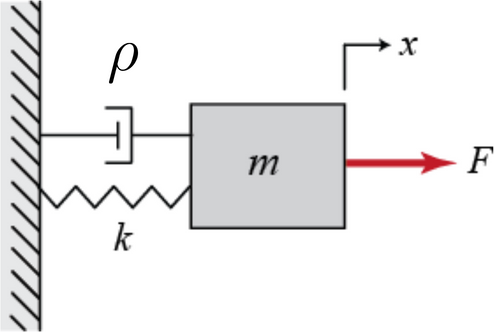

with the following system parameters:

      mass  m = 1.0 kg

      spring constant k = 5.0 N/m

      damping constant $\rho$ = 2 Ns/m


Let us suppose that measured output of the system is a position of the mass and its velocity. Then the state space model of the system is the following:

$$\dot x = Ax + Bu$$
$$ y = Cx$$

where
state vector $x = (p,v)$ (p - position, v - velocity), and state and control matrices are the following:
$$ A = \begin{pmatrix} 0&1\\ -\frac{k}{m}&-\frac{\rho}{m}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix}$$

Let us design a full-state feedback controller which ensure that position of closed loop system tracks the constant reference $y_{ref}(t) = 1.$ 

According to the Lecture 4, such controller can be found in the form $u = -Kx + k_z\int_0^t(y_{ref}(\tau) - p(\tau))\,d\tau.$ 

To implement an integral term let us introduce a new variable $z = \int_0^t(y_{ref}(\tau) - p(\tau))\,d\tau.$ Then $\dot{z} = y_{ref}(t) - p = y_{ref}(t) - Cx,$ where $C = (1,0).$

We now have an augmented system 
$$\dot x = Ax + B(-Kx - k_zz)$$
$$\dot z = y_{ref}(t) - Cx$$

or in matrix form
$$\begin{pmatrix} \dot x\\ \dot z \end{pmatrix} = \begin{pmatrix}A & 0 \\ -C & 0\end{pmatrix}\begin{pmatrix} x\\ z
\end{pmatrix} + \begin{pmatrix} B \\ 0 \end{pmatrix} \begin{pmatrix}-K & -k_z\end{pmatrix}\begin{pmatrix} x\\ z
\end{pmatrix} + \begin{pmatrix}0\\ y_{ref}(t)\end{pmatrix} = (A_a - B_aK_a)\begin{pmatrix} x\\ z
\end{pmatrix} + \begin{pmatrix}0\\ y_{ref}(t)\end{pmatrix} $$ 
where
$$
A_a = \begin{pmatrix}A & 0 \\ -C & 0\end{pmatrix},\ B_a =  \begin{pmatrix} B \\ 0 \end{pmatrix}, K_a = \begin{pmatrix}K & k_z\end{pmatrix}
$$

Hence, the state feedback design with integral action can be done as a normal state feedback design for the augment plant. If $K_a$ is designed such that the closed-loop augmented matrix (A_a - B_aK_a) is Hurwitz, then necessarly in steady - state
$
\lim_{t->+\infty} \dot z(t) = 0 \Rightarrow \lim_{t->+\infty} y(t) = r
$, achieving tracking.

## TODO 

1. Play with code bellow to ensure that closed-loop trajectory additionally meet the following time domain specifications

    Rise time < 10 s
    
    Overshoot < 10%
    
    Steady-state error < 2%    

overshut 0.4109266042323345
ss_error 4.7979398232200765e-11


Text(0.5, 0, 'Time ')

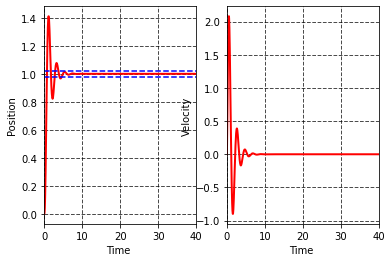

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib.pyplot import *
import control as ctr
from scipy import signal

def Tracking(x, t, Aa, Ba, Ka, r):
  return np.dot(Aa - np.dot(Ba,Ka),x) + np.array([0,0,r])

m = 1
k = 5
rho = 2
g = 9.8

y_ref = 1


A = np.array([[0, 1],
              [-k/m, -rho/m]])

n = A.shape[0]

B = np.array([0,
             1/m]).reshape(n,1)

C = np.array([[1],[0]]).reshape(1,n)

Aa = np.concatenate((np.concatenate((A,-C),axis = 0), np.array([[0],[0],[0]])), axis = 1)
Ba = np.concatenate((B, np.array([[0]])),axis = 0)

x0 = np.array([0,
               0,
               0])

t0 = 0 # Initial time 
tf = 40 # Final time
t = np.linspace(t0, tf, 1000) 

# 1. You can choose arbitary poles lam = [lam_1, lam_2, lam_3], place them in the system 
# and see how dufferent choice of eigenvalues affects the closed - system behavior. 
# lam = np.array([-10,-0.8 - 3j,-0.8 + 3j]) # <- change this to achieve different perfomance
# Ka = signal.place_poles(Aa, Ba, lam).gain_matrix

# 2. Alternatively you may design a closed loop LQR controller and tune the parameters Q, R to meet the requirements
# Q = np.eye(n+1) # <- change this to achive different perfomance
# R = np.array([[1]]) # <- change this to achive different perfomance
# Ka, S, E = ctr.lqr(Aa, Ba, Q, R)

solution = odeint(Tracking, x0 , t, args=(Aa, Ba, Ka, y_ref))
y = solution[:,0]

subplot(1, 2, 1)
plot(t, solution[:,0], linewidth=2.0, color = 'red')
grid(color = 'black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position')
xlabel(r'Time ')

plot(t, 0.98*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')
plot(t, 1.02*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')

overshut = max(abs(y))/y_ref - 1
ss_error = y[len(t)-1]-y_ref
print('overshut', overshut)
print('ss_error', ss_error)

subplot(1, 2, 2)
plot(t, solution[:,1], linewidth=2.0, color = 'red')
grid(color = 'black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity')
xlabel(r'Time ')


## EX 2: Inverted Pendulum

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.
The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

![2024-01-23_13-32-20.png](attachment:2024-01-23_13-32-20.png)

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinate
    
    (theta)   angle between the pendulum and the vertical axis

## TODO

Inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$

$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$    

Let $y_1 = \dot{y}$ and $\theta_1 = \dot{\theta}$


Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinate
    
    (theta)   angle between the pendulum and the vertical axis

Inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$

$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$    

Let $y_1 = \dot{y}$ and $\theta_1 = \dot{\theta}$

Then linearalised model have the following form

$$\dot x = Ax + Bu$$

where state vector $x = (y,y_1,\theta,\theta_1)'$, control vector $u=F$. 

$$\left[\begin{array}{c}\dot{y} \\ \dot{y1} \\ \dot{\theta} \\ \dot{\theta_1}\end{array}\right]=
\left[\begin{array}{cccc}0 & 1 & 0 & 0 \\
0 & \frac{-\left(I+m l^2\right) b}{I(M+m)+M m l^2}& \frac{-g m^2 l^2}{I(M+m)+M m l^2} & 0 \\
0 & 0 & 0 & 1 \\
0 & \frac{m l b}{I(M+m)+M m l^2} & \frac{m g l(M+m)}{I(M+m)+M m l^2} & 0\end{array}\right]
\left[\begin{array}{c}y \\ y_1\\ \theta \\ \theta_1\end{array}\right]+
\left[\begin{array}{c}0 \\ \frac{I+m l^2}{I(M+m)+M m l^2} \\ 0\\ \frac{-m l}{I(M+m)+M m l^2}\end{array}\right] u$$

## TODO

Last time you have designed a full-state feedback controller $u=-Kx, $ which stabilize the system in steady state
$x = (0,0,0,0).$

0. If you haven't done this - do it today! And don't hesitate to ask questions if it is unclear.

This time let us assume that we only measure the position and the angular velocity, while their derivatives are not availabe. I.e. $y_{output} = (y, \theta)' = Cx,$ where 
$$C = \begin{pmatrix} 1 & 0 & 0 &0 \\ 0 & 0 & 1 &0 \end{pmatrix}$$

1. Is pair of matrices (A,C) observable? Why is it important? 

2. For an atonomus system
$$
\dot x = Ax, \ y = Cx
$$

design an observer $$\dot{\hat{x}} = (A - LC)\hat{x} + Ly,$$ such that the estimation of the state $\hat{x}$ converges to real state $x$. To do that we need to find a matrice $L$ such that the matrice $A-LC$ is Hurwits (i.e. all it eiginevalues have negative real part). 

Remark: to place arbitary eigenvalues $\lambda_1,\ldots \lambda_n$ in matrice (A - LC) with matrice L, it is the same as to place $\lambda_1,\ldots \lambda_n$ in matrice $(A^T - C^TL^T)$ with matrice $L^T$. 

Plot a real trajectory $x$ strarting from the point $x_0 = (2,0,1,0)$ and its estimation $\hat{x}$ strating from the point $\hat{x}_0 = (3,-1,2,0.5)$ to show convergence.

3. Design an optimal estimator (LQE) and optimal estimated state feedback controller (LQR) which stabilize the system in (0,0,0,0).

Remark: See slide "observer and controller" in the lecture.
